# The Challenge

### I am a bookworm.

#### I read 3-4 books a month (non-fiction books only) and start 80% of my sentences with "I read somewhere that..." 

This explains why I decided to scrape goodreads.com for this web-scrapping project (the second of NYC DataScience Academy Bootcamp). Goodreads.com is the world's largest site for readers and book recommendations. Amazon acquired it in 2013.

For this project, I was interested in analyzing the **common traits of Top 400 books on goodreads.com**, and predicting the success of a book. The part about predicting will come at a later time. 

I grabbed data for the books under ['Best Book Ever' list](https://www.goodreads.com/list/show/1.Best_Books_Ever). The list includes more than 48,000 books. 

## Table of Content

[Scraping GoodReads.com](#Scraping-GoodReads.com)

[Analyzing the Top 400 books on GoodReads.com](#Analyzing-the-top-400-books-on-GoodReads.com)

[Importing the Modules and Files](#Importing-the-modules-and-files)

[Cleaning the Data](#Cleaning the data)
- [The 'Reviews' Column](#The-'Reviews'-column)

[1- Writing](#1--Writing)
- [Which Genre is most Represented in the Top 400 List?](#Which-genre-is-most-represented-in-the-top-400-list?)
- [Is There an Optimal Number of Pages?](#Is-there-an-optimal-number-of-pages?)

[2- Publishing](#2--Publishing)
- [Does the Year of Publication Matter?](#Does-the-year-of-publication-matter?)
- [Analyzing Another Possible Correlation](#Analyzing-another-possible-correlation)

[3- Predicting](#3--Predicting)
- [Is the Number of Reviews a Predictor of Success?](#Is-the-number-of-reviews-a-predictor-of-success?)
- [Which Words,at Which Frequency, can Predict Success?](#Which-words,-at-which-frequency,-can-predict-success?)
- [Looking at Individual Positive and Negative Words and how they Impact a Book's Ranking](#Looking-at-individual-positive-and-negative-words-and-how-they-impact-a-book's-ranking)
- [Looking at Another Library (Vader Lexicon) to Help Better Predict the Score](#Looking-at-another-library---Vader-lexicon---to-help-better-predict-the-score)

[Would Have, Should Have, Could Have](#Would-Have,-Should-Have,-Could-have)

[The End](#The-End)

## Scraping GoodReads.com

I scraped the ['Best Book Ever' list](https://www.goodreads.com/list/show/1.Best_Books_Ever). In particular, I grabbed the `Ranking` and `Total Score` on the main page, and captured the following information on the book page: 
- `Title`
- `Author`
- `Score`
- `Number Of Rating`
- `Number Of Reviews`
- `Number Of Pages`
- `Genres`
- `Description`
- `Year`
- `Book Cover URL`
- `Reviews`
        
Here is an example of book page. The elements I scraped are highlighted in orange.

<img src="files/book_page.png">

## Analyzing the top 400 books on GoodReads.com

### Importing the modules and files

In [1]:
import csv
import os
import re
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# import matplotlib.pyplot as plt
# %matplotlib inline  
# from  matplotlib import style
# from matplotlib import rcParams

from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
from bokeh.plotting import figure
from bokeh.charts import *
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.charts.attributes import ColorAttr, CatAttr

Loading BokehJS ...

We will be doing a lot of plots in bokeh so we'll **create a function with the aesthetics we will use for each plot**.

In [2]:
def plot_aes(p, legend = "top_right"):
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    p.xaxis.minor_tick_line_color = None
    p.yaxis.minor_tick_line_color = None
    p.title.text_font_size = '16pt'
    p.outline_line_color = None
    p.legend.location = legend

Reading csv file & looking at first five observations:

In [3]:
bestreads = pd.read_csv('bestreads.csv')
bestreads.head()

,NumberOfPages,Description,BookCoverURL,Author,Reviews,MainGenre,Score,NumberOfReviews,NumberOfRating,Year,Title,TotalScore,AllGenres,Ranking
0,374,"The nation of Panem, formed from a post-apocal...",https://www.goodreads.com/book/photo/2767052-t...,Suzanne Collins,I have got to stop poking fun at this series w...,Young Adult,4.35,154127,4788705,2008,The Hunger Games,"2,717,540","Young Adult,Fiction,Science Fiction,Dystopia,F...",1
1,974,See alternate cover edition,https://www.goodreads.com/book/photo/58696.Dav...,Charles Dickens,DAVID COPPERFIELD: MASTER VILLAINoh you archit...,Classics,3.96,4477,160848,2004,David Copperfield,"63,116","Classics,Fiction,Literature,Historical,Literat...",201
2,1152,A bold English adventurer. An invincible Japan...,https://www.goodreads.com/book/photo/402093.Sh...,James Clavell,"So sorry, I am not worthy of the honor of revi...",Historical,4.36,2980,112868,2009,Shgun,"61,792","Historical,Cultural,Japan,Fiction,Classics,Adv...",206
3,870,Harry Potter is due to start his fifth year at...,https://www.goodreads.com/book/photo/2.Harry_P...,J.K. Rowling,I finished this book with tears in my eyes and...,Fantasy,4.46,27414,1792966,2004,Harry Potter and the Order of the Phoenix,"2,261,901","Fantasy,Childrens,Audiobook",2
4,326,"Nine-year-old Oskar Schell is an inventor, ama...",https://www.goodreads.com/book/photo/4588.Extr...,Jonathan Safran Foer,"well, i'm naturally drawn to those people who ...",Fiction,3.97,20855,311495,2006,Extremely Loud and Incredibly Close,"61,819","Fiction,Contemporary,Historical",205


### Cleaning the data

First, let's make sure all of our observations are **unique**.

In [4]:
bestreads.drop_duplicates(inplace = True)

The columns 'Ranking', 'NumberOfPages', 'NumberOfReviews', 'NumberOfRatings' and 'Score' are already of numeric type.
We will **turn the column 'TotalScore' into a numeric type**.

In [5]:
bestreads['TotalScore'] = bestreads['TotalScore'].str.replace(',', '')
bestreads['TotalScore'] = bestreads['TotalScore'].apply(lambda x: int(x))

In our analysis, we will differentiate the books by their ranking. We'll create categories such as 'Top 100', 'Top 100 - 200', etc. In order to do that, we **add a new column 'RankingCat'**.

In [6]:
bestreads['Ranking'] = bestreads['Ranking'].apply(lambda x: int(x)) # convert to integer

def rankingcat(row):
    if (row['Ranking'] >= 1) and (row['Ranking'] <=100):
        return 'Top 100'
    elif (row['Ranking'] > 100) and (row['Ranking'] <=200):
        return 'Top 100 - 200'
    elif (row['Ranking'] > 200) and (row['Ranking'] <=300):
        return 'Top 200 - 300'
    elif (row['Ranking'] > 300) and (row['Ranking'] <=400):
        return 'Top 300 - 400'
    else:
        return 'Top 400 - 500'

bestreads['RankingCat'] = bestreads.apply(lambda x: rankingcat(x), axis = 1)

### The 'Reviews' column

The 'Reviews' column requires a little bit more cleaning. We will have to do some **stemming and lemmatization**. First we'll remove any puntuation and replace multiple white spaces with one. We'll take care of the stemming and lemmatization a bit later, when the time comes.

In [7]:
bestreads['Reviews'] = [re.sub( '[!"#$%&()*+\',-.:;<=>?@[]^_`{|}~/&]*', " ", reviews).strip() for reviews in bestreads['Reviews']]
bestreads['Reviews'] = [re.sub( '\s+', " ", reviews).strip() for reviews in bestreads['Reviews']]
bestreads['Reviews'] = [re.sub( '\d+', " ", reviews).strip() for reviews in bestreads['Reviews']]
bestreads['Reviews'] = [reviews.lower() for reviews in bestreads['Reviews']]

Removing the words that don't matter much in the Reviews columns (e.g. I, and, the, this, etc.):

In [8]:
from nltk.corpus import stopwords
from nltk.tag import pos_tag

stop_words = set(stopwords.words("english"))
bestreads['Reviews'] = bestreads['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

Removing any additional words with 1 or 2 letters:

In [9]:
shortword = re.compile(r'\W*\b\w{1,2}\b')
bestreads['Reviews'] = [shortword.sub('', word) for word in bestreads['Reviews']]

#### Now that we cleaned our data, it is time to move to our analysis. 

We will divide our analysis in 3 parts:
- Writing
- Publishing
- Predicting

##### The first 2 parts will aim at guiding any author BEFORE he/she writes a book in order to make it to the top 400 list.

We will answer the following questions:
- Which genre is most represented in the top 400 list?
- Is there an optimal number of pages?
- Does the year of publication matter?

##### The last part aims at predicting the success of a book AFTER it is published.

We will answer the following questions:
- Is the number of reviews a predictor of success?
- Which words, at which frequency, can predict success?

## 1- Writing

### Which genre is most represented in the top 400 list?

Let's first look at the distribution of the top 400 books by genre.

#### Adjusting the dataset

A book may have multiple genres. Right now, the genres are all in one column (separated by a comma) so we will need to create a dataframe and have as many rows as there are genres for each book.

We'll have to separate the genres first, then create a Python `dictionary` and convert it back to a `dataframe`.

In [112]:
df_genre = bestreads.copy()
df_genre.AllGenres = df_genre.AllGenres.apply(lambda x: x.split(','))

In [113]:
df_genre.iloc[0].to_dict()
df_genre = pd.concat([pd.DataFrame(df_genre.iloc[i].to_dict()) for i in range(len(df_genre))])

Let's check our updated dataframe. We can see that we now have one genre by row (in the column `AllGenres`)

In [114]:
df_genre.head()

,AllGenres,Author,BookCoverURL,Description,MainGenre,NumberOfPages,NumberOfRating,NumberOfReviews,Ranking,RankingCat,Reviews,Score,Title,TotalScore,Year
0,Young Adult,Suzanne Collins,https://www.goodreads.com/book/photo/2767052-t...,"The nation of Panem, formed from a post-apocal...",Young Adult,374,4788705,154127,1,Top 100,got stop poking fun series memes. someone take...,4.35,The Hunger Games,2717540,2008
1,Fiction,Suzanne Collins,https://www.goodreads.com/book/photo/2767052-t...,"The nation of Panem, formed from a post-apocal...",Young Adult,374,4788705,154127,1,Top 100,got stop poking fun series memes. someone take...,4.35,The Hunger Games,2717540,2008
2,Science Fiction,Suzanne Collins,https://www.goodreads.com/book/photo/2767052-t...,"The nation of Panem, formed from a post-apocal...",Young Adult,374,4788705,154127,1,Top 100,got stop poking fun series memes. someone take...,4.35,The Hunger Games,2717540,2008
3,Dystopia,Suzanne Collins,https://www.goodreads.com/book/photo/2767052-t...,"The nation of Panem, formed from a post-apocal...",Young Adult,374,4788705,154127,1,Top 100,got stop poking fun series memes. someone take...,4.35,The Hunger Games,2717540,2008
4,Fantasy,Suzanne Collins,https://www.goodreads.com/book/photo/2767052-t...,"The nation of Panem, formed from a post-apocal...",Young Adult,374,4788705,154127,1,Top 100,got stop poking fun series memes. someone take...,4.35,The Hunger Games,2717540,2008


Before doing any plots involving genres, we'll check how many of them we have and select the ones that constitute ** 80% of the dataset**.

In [13]:
len(set(df_genre['AllGenres'])) #there are 193 genres. 

193

In [14]:
from collections import Counter

# count number of books per genre
counter = Counter(df_genre['AllGenres']) # create dictionary with list of each genre and # of books per genre
counter_df = pd.DataFrame(counter.items(), columns = ['Genre', 'Count']) # turn dictionary into dataframe
counter_df = counter_df.sort_values('Count', ascending = False)

# replace name of Genre to "Other" when Genre has less than 75 books associated with it
counter_df['Genre'][counter_df['Count']<75] = 'Other'

counter_df = counter_df.groupby('Genre').sum()
counter_df_index = counter_df.reset_index()
counter_df_no_other = counter_df_index[counter_df_index['Genre'] != 'Other']

# convert count to %
counter_df_percent = counter_df.apply(lambda x: (x/sum(counter_df['Count'])*100))
counter_df_percent = counter_df_percent.reset_index()
counter_df_percent_no_other = counter_df_percent[counter_df_percent['Genre'] != 'Other']

# exlude others from analysis
counter_df_percent_no_other = counter_df_percent_no_other.sort_values(by = 'Count', ascending = False)

#### Visualizing our results

##### Percentage of Books in Top 400 by Genre

In [173]:
# plot the results
hover = HoverTool(
        tooltips=[
            ("Genre", "@Genre"),
            ('Percent','$y{1.1}%')
        ]
    )

palette_key = 3
p = Bar(counter_df_percent_no_other,
        label=CatAttr(columns=['Genre'], sort=False), 
        values='Count',
        color = color(columns = 'Genre', palette = ['#d3ffce', '#ffd1d1', '#c6e2ff', '#dba087', '#d8be7e', '#b1d0ca','#cfb7ae', '#cfaec6', '#9ebbc6']),
        xlabel="",
        ylabel=" ",
        title="Percentage of Books in Top 400 by Genre",
        tools = [hover],
        plot_width=950, plot_height=400,
        legend = False
       )
# p.toolbar_location = None

plot_aes(p)
show(p)

##### Top 5 Genres by Rank Category

We will create another dataframe where we group the genres by ranking categories (e.g Top 100, Top 100-200, etc.).

In [116]:
df_genre_stacked = df_genre[['RankingCat','AllGenres', 'Ranking']].groupby(['RankingCat', 'AllGenres']).size().rename('Count')
df_genre_stacked = df_genre_stacked.reset_index()

# sort the columns by # of books in descending order
df_genre_stacked = df_genre_stacked.sort_values(by=['RankingCat', 'Count'], ascending = False)

In [175]:
# plot the results
filtered_genres = ['Fiction','Fantasy','Classics','Romance','Young Adult', 'Literature','Historical','Science Fiction','Contemporary','Childrens','Cultural','Academic','Novels','Thirller','European Literature','Adventure','Audiobook']
df_genre_filtered = df_genre_stacked[df_genre_stacked['AllGenres'].isin(filtered_genres)]

hover = HoverTool(
        tooltips=[
            ("Genre", "$x"),
            ('Count', "@Count")
        ]
    )

data = {'Ranking Category': df_genre_filtered['RankingCat'],
        'Count': df_genre_filtered['Count'],
        'Genre': df_genre_filtered['AllGenres']}

p = HeatMap(data, y='Ranking Category', x='Genre', values='Count',
             title='Top 5 Genres by Rank Category', stat=None, xlabel="",
            ylabel="",
            tools = [hover],
            plot_width=950, plot_height=450,palette=['#7ea4b3', '#9ebbc6', '#cedde2', '#bed1d8','#dee8eb']) 

plot_aes(p)
p.yaxis.major_label_orientation = 'horizontal'

show(p)

#### Challenging our findings

From the two graphs above, it seems that a book will be more likely to make it to the top 400 if its genre is Fiction, Fantasy or Classics. 

What if these 3 genres are simply highly represented? 
We expect that the likelihood of a genre to make it to the top 400 is proportional to the genre's prevalence for all books on GoodReads.com.

##### Bringing in another dataset: our Control list

The top 400 list is meaningless if we can't put it into context by comparing it to the worst 400 list. Unfortunately, there is no such list. 

In the absence of a 'Worst Ever Books' list, we will look at a sample of the books on GoodReads.com. 

As of 2017, GoodReads had more than 1.5 billion books. We will scrape a random sample of 10,000 books and apply the exact same data cleaning process as we did for our top 400 lists. 

I won't include the code for this list in this notebook. However, you can find it all in the notebook named GoodReads.ipynb.



In [118]:
# importing the 'control' dataset for the graph. Dataset has already been cleaned and filtered.
goodreads_books_per_genre = pd.read_csv('goodreads/files/section1a_books_per_genre.csv')

In [293]:
# plot the results (top 9 only)
goodreads_books_per_genre_top_9 = goodreads_books_per_genre[0:9]

hover = HoverTool(
        tooltips=[
            ("Genre", "@Genre"),
            ('Percent','$y{1.1}%')
        ]
    )

palette_key = 3
p = Bar(goodreads_books_per_genre_top_9,
        label=CatAttr(columns=['Genre'], sort=False), 
        values='Count',
        color = color(columns = 'Genre', palette = ['#CFCFC4','#c6e2ff', '#dba087', '#CFCFC4', '#CFCFC4', '#CFCFC4','#CFCFC4', '#CFCFC4', '#9ebbc6']),
        xlabel="",
        ylabel=" ",
        title="Percentage of Books by Genre on GoodReads.com (Control List)",
        tools = [hover],
        plot_width=950, plot_height=400,
        legend = False
       )
# p.toolbar_location = None

plot_aes(p)
show(p)

# adding the plot for top 400 to help compare
hover = HoverTool(
        tooltips=[
            ("Genre", "@Genre"),
            ('Percent','$y{1.1}%')
        ]
    )

palette_key = 3
p = Bar(counter_df_percent_no_other,
        label=CatAttr(columns=['Genre'], sort=False), 
        values='Count',
        color = color(columns = 'Genre', palette = ['#d3ffce', '#ffd1d1', '#c6e2ff', '#dba087', '#d8be7e', '#b1d0ca','#cfb7ae', '#cfaec6', '#9ebbc6']),
        xlabel="",
        ylabel=" ",
        title="Percentage of Books in Top 400 by Genre",
        tools = [hover],
        plot_width=950, plot_height=400,
        legend = False
       )
# p.toolbar_location = None

plot_aes(p)
show(p)

The Classics genre is under-represented on GoodReads.com. And yet, it is highly represented in the top 400 list. 

On the other hand, although the Fiction, Fantasy and Young Adult genres are popular, they also represent a significant proportion of the books on GoodReads.com. Their likelihood to be in the top 400 is then higher than an under-represented genre like Classics.

Readers may be more likely to enjoy the Classics. This is a genre a new author may want to consider...

### Is there an optimal number of pages?

The second question revolves around the optimal number of pages. Let's look at the distribution of the top 400 books by number of pages and compare it to the number of pages for our 'control' list.

#### Adjusting the dataset

In [190]:
# importing the 'control' dataset for the graph. Dataset has already been cleaned and filtered.
goodreads_books_pages = pd.read_csv('goodreads/files/section1b_number_of_pages.csv')

#### Visualizing our results

In [197]:
from bokeh.models import LinearAxis, Range1d

hover = HoverTool(
        tooltips=[
            ("Number of pages", "$y{int}"),
            ('Score','$x')
        ]
    )

p = Scatter(bestreads, 
            x="Score", 
            y="NumberOfPages", 
            title="Distribution of Pages by Score (Top 400)",
            xlabel='Score', 
            ylabel='Number of Pages',
            tools = [hover, 'box_zoom', 'reset'],
            color = ['#7ea4b3'],
            plot_width=950, plot_height=300)
    
p.y_range = Range1d(-100,1750)
p.x_range = Range1d(3.5,5)
plot_aes(p)
show(p)


hover = HoverTool(
        tooltips=[
            ("Number of pages", "$y{int}"),
            ('Score','$x')
        ]
    )

p = Scatter(goodreads_books_pages, 
            x="Score", 
            y="NumberOfPages", 
            title="Distribution of Pages by Score (Control List)",
            xlabel='Score', 
            ylabel='Number of Pages',
            tools = [hover, 'box_zoom', 'reset'],
            color = ['#7ea4b3'],
            plot_width=950, plot_height=300)

p.x_range = Range1d(3.5,5)
plot_aes(p)
show(p)

We see a similar trend between the Control and Top 400 lists. The number of pages is not a predictor of success.

## 2- Publishing

## Does the year of publication matter?

Let's analyze any possible trends in year of publication in the Top 400 list. 

- First, we will look at a possible correlation with the number of pages. 
- We'll then look for a correlation with the number of books solds.

#### Adjusting the dataset

In [19]:
# create df with year and # of books per year
year_count = bestreads[['NumberOfPages','Year']].groupby('Year').size().rename('Count').reset_index()
year_count

# create df with year and avg # of pages per year
year_pages = bestreads[['NumberOfPages','Year']].groupby('Year').mean().reset_index()
year_pages['NumberOfPages'] = year_pages['NumberOfPages'].round()

#### Visualizing our results

In [230]:
from bokeh.models import LinearAxis, Range1d
from bokeh.models import Span, Label

hover = HoverTool(
        tooltips=[
            ('Year','$x{int}'),
        ]
    )

citation = Label(x=2005, y=38,
                 text= '2006', 
                 render_mode='css', 
                 border_line_alpha=1.0, 
                 text_font_size = '10pt', 
                 text_color = 'black')

p = figure(plot_width=950, plot_height=400, title='Total Count & Average Number of Pages (by Year of Publication)', tools = [hover])
p.quad(top = year_count['Count'],
       bottom = 0, 
       right=year_count['Year']-0.4, 
       left=year_count['Year']+0.4, color = '#7ea4b3',
       legend = 'Number of Books')

p.yaxis.visible = False
# p.extra_y_ranges = {"NumberOfPages": Range1d(start=0, end=300)}
# p.add_layout(LinearAxis(y_range_name="NumberOfPages"), 'right')
p.line(year_pages['Year'],
       year_pages['NumberOfPages']/40, 
       line_width=2, 
       line_color = '#cfaec6',
       legend = "Average Number of Pages") # dividing # of pages by 40 to fit in plot

plot_aes(p, legend = "top_left")
p.add_layout(citation)
show(p)

A significant proportion of the books in the Top 400 list were published between 2003 and 2006. 
Although some peaks in the average number of pages published coincide with some peaks in the number of books in the Top 400, there is no correlation between the two variables.

It is interesting to see that the trend for the Control list differs from the trend for the top 400. 2006 stands out too in the Control list however we notice that a lot of books were published after 2010. Yet, the books published after 2010 don't make for a bit proportion of the top 400 list.

In [238]:
# importing the 'control' dataset for the graph. Dataset has already been cleaned and filtered.
goodreads_books_year = pd.read_csv('goodreads/files/section2_books_per_year.csv')
goodreads_books_year_count = pd.read_csv('goodreads/files/section2_books_per_year_count.csv')

In [242]:
from bokeh.models import LinearAxis, Range1d
from bokeh.models import Span, Label

hover = HoverTool(
        tooltips=[
            ('Year','$x{int}'),
        ]
    )

citation = Label(x=2005, y=42,
                 text= '2006', 
                 render_mode='css', 
                 border_line_alpha=1.0, 
                 text_font_size = '10pt', 
                 text_color = 'black')

p = figure(plot_width=950, plot_height=300, title='Total Count & Average Number of Pages (by Year of Publication)', tools = [hover])
p.quad(top = goodreads_books_year_count['Count'],
       bottom = 0, 
       right=goodreads_books_year_count['Year']-0.4, 
       left=goodreads_books_year_count['Year']+0.4, color = '#7ea4b3',
       legend = 'Number of Books')

# p.yaxis.visible = False
# p.extra_y_ranges = {"NumberOfPages": Range1d(start=0, end=300)}
# p.add_layout(LinearAxis(y_range_name="NumberOfPages"), 'right')
p.line(goodreads_books_year['Year'],
       goodreads_books_year['NumberOfPages']/40, 
       line_width=2, 
       line_color = '#cfaec6',
       legend = "Average Number of Pages") # dividing # of pages by 40 to fit in plot

plot_aes(p, legend = "top_left")
p.add_layout(citation)
show(p)

##### For the curious ones, below is a list of the top 10 books in 2003, 2004 and 2006.
*The first column refers to the ranking among the Top 400*.

In [220]:
# looking at the list of books from the top 3 years (2003, 2004, 2006)
books_2003 = bestreads[bestreads['Year'].isin([2003])][['Title','Year','Ranking']].sort_values(by='Ranking').set_index('Ranking')
books_2003.index = books_2003.index.rename(None)
books_2004 = bestreads[bestreads['Year'].isin([2004])][['Title','Year','Ranking']].sort_values(by='Ranking').set_index('Ranking')
books_2004.index = books_2004.index.rename(None)
books_2006 = bestreads[bestreads['Year'].isin([2006])][['Title','Year','Ranking']].sort_values(by='Ranking').set_index('Ranking')
books_2006.index = books_2006.index.rename(None)

In [221]:
from IPython.display import display,HTML

def multi_column_df_display(list_dfs, cols=3):
    html_table = "<table style='width:100%; border:0px'>{content}</table>"
    html_row = "<tr style='border:0px'>{content}</tr>"
    html_cell = "<td style='width:{width}%;vertical-align:top;border:0px'>{{content}}</td>"
    html_cell = html_cell.format(width=100/cols)

    cells = [ html_cell.format(content=df.to_html()) for df in list_dfs ]
    cells += (cols - (len(list_dfs)%cols)) * [html_cell.format(content="")] # pad
    rows = [ html_row.format(content="".join(cells[i:i+cols])) for i in range(0,len(cells),cols)]
    display(HTML(html_table.format(content="".join(rows))))

list_dfs = []
list_dfs.append(books_2003.head(10))
list_dfs.append(books_2004.head(10))
list_dfs.append(books_2006.head(10))
multi_column_df_display(list_dfs,cols=3)

,Title,Year
8,Animal Farm,2003
23,Jane Eyre,2003
32,Anne of Green Gables,2003
37,One Hundred Years of Solitude,2003
38,The Princess Bride,2003
51,A Tale of Two Cities,2003
61,Frankenstein,2003
85,The Fellowship of the Ring,2003
89,Don Quixote,2003
97,"Moby-Dick; or, The Whale",2003


#### Analyzing another possible correlation

Is there a correlation between the number of books sold and the number of books in the top 400? 

This is highly probable... The higher the number of unique books sold in a year, the higher the chances that there will be more books in the Top 400 from that year.

The US census bureau provides the [number of books sold per year](http://www.census.gov/retail/mrts/www/data/excel/mrtssales92-present.xls). However, the data is only for books sold in US bookstores from 1992 - 2014. This means that:
- The sample size is limited (23 years).
- Online sales are not taken into account and we expect this number to be high starting in 2000s.
- It does not report the number of unique books sold, meaning we could have 1000 books sold a year and there are all Harry Potter's copies.

In [231]:
# create a dataframe with sales of books per year (sold in US bookstores)
stats_book = pd.DataFrame([[2014, 10544], [2013, 11897], [2012, 13404],
                          [2011, 13861], [2010, 15442], [2009, 16051],
                          [2008, 16870], [2007, 17184], [2006, 16983],
                          [2005, 16889], [2004, 16877], [2003, 16236],
                          [2002, 15450], [2001, 15098], [2000, 14879], 
                          [1999, 14172], [1998, 13282], [1997, 12742], 
                          [1996, 11905], [1995, 11196], [1994, 10107], 
                          [1993, 9018], [1992, 8327]],
                          columns = ['Year', '$Millions/Month'])
stats_book = stats_book.sort_values(by='Year')
stats_book_merged = pd.merge(stats_book, year_count , how='inner', on = 'Year')

In [235]:
# plot the results to see if correlation between books sold and # of books in top 400.
hover = HoverTool(
        tooltips=[
            ("Number of Books in Top 400", "$y{int}"),
            ('Number of Books Sold',"$x{int}")
        ]
    )


p = Scatter(stats_book_merged, 
            x="$Millions/Month", 
            y="Count", 
            title="Number of Books Sold vs. Number of Books in Top 400",
            xlabel='# of Books Sold in US ($Millions)', 
            ylabel='Number of Books in Top 400',
            tools = [hover],
            color = ['#7ea4b3'],
            plot_width=950, plot_height=300)

p.line([8000,18000], [-1,40], line_width=1.5, line_color = '#dba087')
plot_aes(p)
show(p)

## 3- Predicting

For the last part of our analysis, we will analyze first if the number of reviews is a predictor of success. We'll then move to Sentiment Analysis and dive into the reviews themselves.

### Is the number of reviews a predictor of success?

#### Adjusting the dataset

In [243]:
# filter df with only Number of Reviews, Ranking Category and Score
reviewscount_df = bestreads[['NumberOfReviews','RankingCat', 'Score']]

#### Visualizing our results

In [246]:
# hover = HoverTool(
#         tooltips=[
#             ("Value", "$y{int}")
#         ]
#     )

p = BoxPlot(reviewscount_df, 
            values='NumberOfReviews', 
            label='RankingCat',
            title="Number of Reviews per Ranking Category", 
            ylabel='Number of Reviews',
            xlabel='',
            tools = ['box_zoom', 'reset'],
            color = ['#cfaec6'],
            whisker_color='black',
            legend = None,
#             marker= 'x',
            outliers=False,
            plot_width=950, plot_height=400)

p.left[0].formatter.use_scientific = False
p.xaxis.major_label_orientation = 'horizontal'

plot_aes(p)
show(p)

The number of reviews is an indicator of success. We see a clear trend that the top 100 books receive more reviews than the top 100-200 books, which themselves receive more reviews than the top 200-300, etc.

#### Challenging our findings

We could expect the best and worst books to get the most reviews. An average book does not spark strong emotions (whether positive or negative). The best and worst ones do.

However, the 'Control List" does not confirm this assumption. On the contrary, the five-star books gets less reviews than the four-star book while the one or two-star books receive barely any reviews.

The hypothesis that the more star, the more reviews can't be confirmed and validated.

In [247]:
# importing the 'control' dataset for the graph.
goodreads_reviews_count = pd.read_csv('goodreads/files/section3_reviews_count.csv')

In [249]:
# plot the results to see if correlation between books sold and # of books in top 400
# hover = HoverTool(
#         tooltips=[
#             ("Value", "$y{int}")
#         ]
#     )

p = BoxPlot(goodreads_reviews_count, 
            values='NumberOfReviews', 
            label='ScoreCat',
            title="Number of Reviews per Star", 
            ylabel='Number of Reviews',
            xlabel='',
            tools = ['box_zoom', 'reset'],
            color = ['#cfaec6'],
            whisker_color='black',
            legend = None,
#             marker= 'x',
            outliers=False,
            plot_width=950, plot_height=400)

p.left[0].formatter.use_scientific = False
p.xaxis.major_label_orientation = 'horizontal'

plot_aes(p)
show(p)

### Which words, at which frequency, can predict success?

We will start our sentiment analysis on the `Reviews` column using the AFINN dictionary. 

The output of the AFINN method is a float variable (the AFINN score) that if larger than zero indicates a positive sentiment and less than zero indicates negative sentiment. The scale ranges from -5 to +5.

##### Testing the Afinn method on the Control list first
We need a method that has a high level of granularity to be able to identify which words can predict a book's ranking in the top 400 list.

This explains why, before applying the Afinn method to the Top 400 list, we need check its reliability on a braoder list, i.e. the Control list.

In [269]:
# importing the 'control' dataset for the graph.
goodreads_afinn_plot = pd.read_csv('goodreads/files/section3_afinn_plot.csv')

In [273]:
# plotting the boxplots to analyze possible trends between ranking category and afinn score
p = BoxPlot(goodreads_afinn_plot, 
            values='senti_value', 
            label='ranking_category',
            title='Sentiment Score by Score Category - using AFINN (Control List)',
            ylabel='Average sentiment score',
            xlabel='',
            tools = ['box_zoom', 'reset'],
            color = ['#cfaec6'],
            whisker_color='black',
            legend = None,
#             marker= 'x',
            outliers=False,
            plot_width=950, plot_height=400)

p.left[0].formatter.use_scientific = False
p.xaxis.major_label_orientation = 'horizontal'

plot_aes(p)
show(p)

The Afinn Lexicon seems to be a good indicator of success. Let's take it one step further and see if it can help differentiate a book in the top 100 list from a book in the Top 300 list.

#### Adjusting the dataset

In [26]:
from itertools import *
from nltk.tokenize import wordpunct_tokenize 
from __future__ import division

from afinn import Afinn
afinn = Afinn()

In [27]:
# filtering df with the relevant columns
filtered_df = bestreads[['RankingCat','Reviews', 'Score', 'Title']]

We will compute the average sentiment score for each review. We already cleaned the Reviews columns by removing any 'stop words' and punctuation, as well as converting all lower cases to upper cases.

In [29]:
unigrams = []
afinn_value = []
ranking_category = []
score = []
for ind, review in islice(filtered_df.iterrows(),388):
    unigrams = ( [i for i in wordpunct_tokenize(review['Reviews'])])
    afinn_value.append(np.mean(list(map(lambda x: afinn.score(str(x.encode('utf-8'))), unigrams))))
    ranking_category.append(review['RankingCat'])
    score.append(review['Score'])

#### Visualizing our results

In [274]:
# joining the 3 lists in a dataframe
afinn_plot = pd.DataFrame()
afinn_plot['ranking_category'] = ranking_category
afinn_plot['senti_value'] = afinn_value
afinn_plot['score'] = score

# plotting the boxplots to analyze possible trends between ranking category and afinn score
p = BoxPlot(afinn_plot, 
            values='senti_value', 
            label='ranking_category',
            title='Sentiment Score by Ranking Category - using AFINN (Top 400 List)',
            ylabel='Average sentiment score',
            xlabel='',
            tools = ['box_zoom', 'reset'],
            color = ['#cfaec6'],
            whisker_color='black',
            legend = None,
#             marker= 'x',
            outliers=False,
            plot_width=950, plot_height=400)

p.left[0].formatter.use_scientific = False
p.xaxis.major_label_orientation = 'horizontal'

plot_aes(p)
show(p)

The Afinn lexicon does not help predict the ranking of a book: the average sentiment score is the same for the books in the top 400 list.

Although the Afinn method works for a broader list, it is not granular enough to predict ranking in our top 400 list (where all the books are successful by definition).

The graph below offers the same insight as the boxplot for our Top 400. We are using a continous variable (the score) instead of a discrete one (the ranking category).

In [275]:
hover = HoverTool(
        tooltips=[
            ("GoodReads Score", "$x{int}"),
            ('Afinn Score',"$y")
        ]
    )


p = Scatter(afinn_plot, 
            x="score", 
            y="senti_value", 
            title="GoodReads Score vs. Sentiment Score - using AFINN (Top 400)",
            xlabel='GoodReads score', 
            ylabel='Average sentiment score',
            tools = [hover],
            color=color('ranking_category', palette=['#2171b5','#9ecae1','#6baed6','#c6dbef']),
#             color = 'ranking_category',
            plot_width=950, plot_height=400)

p.ray(x=[0], y=[0], length=0, angle=0, line_width=1.5,color = ['#dba087'])
    
plot_aes(p)
show(p)

In the scatterplot above, the sentiment score does not go below -1.5. This makes sense as we don't expect the 'Best Ever' Books to have highly negative sentiment score (i.e -3, -4 or -5). However there’s still a small amount of prediction error; some top 100 books have a negative sentiment score.

In order to predict the ranking of a book within the top 400 list, we need to be more granular:
- Instead of looking at the overall score for the reviews, we will analyze each word within the review and how its Afinn score and it frequency can predict the ranking of a book.
- We will also look at another library, the Vader lexicon, which offers more granularity.

#### Looking at individual positive and negative words and how they impact a book's ranking

We will transform the dataframe to a one-row-per-word-per-bookreview dataframe. The code below takes quite some time to execute so we'll comment it out, save the dataframe as a csv and import it back.

In [260]:
# # creating a new df from filtered_df
# filtered_df_token = filtered_df[['RankingCat', 'Reviews', 'Score', 'Title']]

# # splitting each word in the Reviews column. We dismiss the proper nouns
# filtered_df_token['Reviews'] = filtered_df_token['Reviews'].apply(lambda x: [word for word,pos in pos_tag(x.split()) if pos != 'NNP'])
# filtered_df_token

# # turning the filtered_df_token dataframe into a one-row-per-word-per-bookreview dataframe. We need to turn it into a dictionary and 
# # back to a dataframe
# filtered_df_token = pd.concat([pd.DataFrame(filtered_df_token.iloc[i].to_dict()) for i in range(len(filtered_df_token))])

# # lemmatizing words
# from nltk.stem.wordnet import WordNetLemmatizer
# lmtzr = WordNetLemmatizer()
# filtered_df_token['Reviews'] = filtered_df_token['Reviews'].apply(lambda x: lmtzr.lemmatize(x))

# # assigning AFINN score to each word
# filtered_df_token['afinn_score'] = [afinn.score(word) for word in filtered_df_token['Reviews']]

# print filtered_df_token.tail(10)

In [259]:
# save dataframe created above as a csv and import it (to avoid running the code above)
filtered_df_token.to_csv('files/section3_filtered_df_token.csv', index=False)
filtered_df_token = pd.read_csv('files/section3_filtered_df_token.csv')

In [261]:
print filtered_df_token.tail(10)

        RankingCat        Reviews  Score                   Title  afinn_score
2170606    Top 100           well   4.27  The Fault in Our Stars          0.0
2170607    Top 100        written   4.27  The Fault in Our Stars          0.0
2170608    Top 100            fan   4.27  The Fault in Our Stars          3.0
2170609    Top 100           alll   4.27  The Fault in Our Stars          0.0
2170610    Top 100           john   4.27  The Fault in Our Stars          0.0
2170611    Top 100           book   4.27  The Fault in Our Stars          0.0
2170612    Top 100            one   4.27  The Fault in Our Stars          0.0
2170613    Top 100    masterpiece   4.27  The Fault in Our Stars          4.0
2170614    Top 100           even   4.27  The Fault in Our Stars          0.0
2170615    Top 100  exaggerating.   4.27  The Fault in Our Stars         -2.0


We want to count how many times a word appears in a review to better gauge its impact on the ranking.

We will create a dataframe where we look at each word and compute the average time it appears in the reviews. We will then analyze the average goodreads score a book received based on a word's appearance and frequency in the reviews.

In [33]:
afinn_scatter_df = filtered_df_token.groupby('Reviews').agg({'Score': 'mean', 
                                          'afinn_score': 'first', 
                                          'Title':'count'}).rename(columns={'Title':'Count'}).reset_index()

# only keeping the words that appears at least 1000 times
afinn_scatter_df_1500 = afinn_scatter_df[afinn_scatter_df['Count']>1500]
afinn_scatter_df_1500
# removing some punctuations we still have left
punct = [')',',','-','--','.',':']
afinn_scatter_df_1500 = afinn_scatter_df_1500[~afinn_scatter_df_1500['Reviews'].isin(punct)]

In [266]:
from bokeh.models import Span, ColumnDataSource, Range1d, LabelSet, Label

tooltips=[
            ('Word', '@Reviews')
        ]

p = Scatter(afinn_scatter_df_1500, 
            x="afinn_score", 
            y="Score", 
            title="Afinn Score vs. GoodReads Score",
            xlabel='Afinn Score', 
            ylabel='Average GoodReads Score',
            tooltips = tooltips,
            color=color('afinn_score', palette=['#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#2171b5', '#084594']),
            plot_width=950, plot_height=400, legend=False)

p.line([-3.5,3], [3.8,4.3], line_width=1.5, line_color = '#dba087')

plot_aes(p)
show(p)

Words like `loved`, `best`, which have a high Afinn Score (score of 3) don't coincide with a higher GoodReads score than neutral words such `series`, `movies` that have a Afinn score of 0.

*Make sure to hover over the dots to see which word each dots corresponds to.*

In [290]:
from bokeh.models import Span, ColumnDataSource, Range1d, LabelSet, Label

# adding vertical line
vline = Span(location=1500, dimension='height', line_color='#dba087', line_width=1.5)

# adding label next to vertical line
citation_1 = Label(x=1250, y=3.74,
                 text='1500', 
                 render_mode='css', 
                 border_line_alpha=1.0, 
                 text_font_size = '8pt', 
                 text_color = '#c59079')

citation_2 = Label(x=15500, y=4.15,
                 text='Afinn Score', 
                 render_mode='css', 
                 border_line_alpha=1.0, 
                 text_font_size = '10pt', 
                 text_color = 'black')

tooltips=[
            ('Word', '@Reviews')
        ]

p = Scatter(afinn_scatter_df_1500, 
            x="Count", 
            y="Score", 
            title="Word Count vs. GoodReads Score",
            xlabel='Word Count', 
            ylabel='Average GoodReads Score',
            tooltips = tooltips,
            color=color('afinn_score', palette=['#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#2171b5']),
            plot_width=950, plot_height=300)


p.renderers.extend([vline])
p.add_layout(citation_1)
p.add_layout(citation_2)
p.toolbar_location = None
p.x_range = Range1d(0, 17000)

plot_aes(p, legend ='bottom_right')
show(p)

In the scatterplot above, we look at words that appear at least 1500 times in the reviews. The goal is to detect a possible correlation between a word's frequency and the GoodReads score, given its Afinn score (represented by the color of the dots).

Unfortunately, there is no clear pattern and this method won't help us predict the ranking of a book in the top 400. This approach was also fruitless with the Control list.

#### Looking at another library - Vader lexicon - to help better predict the score

We have not been very successful with the Afinn lexicon. The Vader lexicon may be more helpful: its algorithm outputs sentiment scores to 4 classes of sentiments:
- neg: Negative 
- neu: Neutral
- pos: Positive
- compound: Compound (i.e. aggregated score computed by summing the valence scores of each word in the reviews, adjusted according to the Vader rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive))

We want to analyze the reliability of the Vader lexicon at predicting the ranking of a book in the top 400 list. 

We will need to make quite a few adjustements to our dataframe first in order to have the 4 Vader's classes of sentiments in different columns. 

In [36]:
# using the Vader Lexicon instead
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [37]:
sentences = [review for review in bestreads['Reviews']]
sid = SentimentIntensityAnalyzer()

In [38]:
# create a list of all the VaderScore from the reviews column
vader_score_list = []
for sentence in sentences:
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        vader_score_list.append('{0}: {1}'.format(k, ss[k]))
        
# turn the list into a dataframe and split into 2 columns
vader_df = pd.DataFrame({'VaderScore': vader_score_list})
vader_df = pd.DataFrame(vader_df['VaderScore'].str.split(':',1).tolist(),columns = ['Desc','Score'])

In [100]:
# turning the dataframe from long to wide. Crosstab or pivot don't work for this kind of format. Creating separate lists
# and concatening them
compound = []
neg = []
neu = []
pos = []
for index, row in vader_df.iterrows():
    if row['Desc'] == 'compound':
        compound.append(row['Score'])
    elif row['Desc'] == 'neg':
        neg.append(row['Score'])
    elif row['Desc'] == 'neu':
        neu.append(row['Score'])
    else:
        pos.append(row['Score'])
vader_df_wide = pd.DataFrame(np.vstack((compound, neg, neu, pos)).T, columns = ['compound','neg','neu','pos'])

# checking that the length of the new dataframe vader_df_wide is the same as filtered_df
len(filtered_df) == len(vader_df_wide)

# merging the 2 dataframes
filtered_vader_df = pd.concat([filtered_df,vader_df_wide], axis=1)

# turn the compoung, neg, pos and neu control to integer
filtered_vader_df['compound'] = filtered_vader_df['compound'].apply(lambda x: round(float(x),3))
filtered_vader_df['neg'] = filtered_vader_df['neg'].apply(lambda x: round(float(x),2))
filtered_vader_df['neu'] = filtered_vader_df['neu'].apply(lambda x: round(float(x),2))
filtered_vader_df['pos'] = filtered_vader_df['pos'].apply(lambda x: round(float(x),2))

In [101]:
# join with filtered_df_token to add the afinn score
filtered_df_token_for_merge = filtered_df_token[['Title','afinn_score']].groupby('Title').mean().reset_index()
filtered_df_token_for_merge['afinn_score'] = filtered_df_token_for_merge['afinn_score'].round(2)
filtered_vader_df = pd.merge(filtered_vader_df, filtered_df_token_for_merge, how='left', on='Title')

# renaming score column for clariy purposes
filtered_vader_df = filtered_vader_df.rename(columns={'Score': 'goodreads_score'})

,RankingCat,Reviews,goodreads_score,Title,compound,neg,neu,pos,afinn_score
0,Top 100,got stop poking fun series memes. someone take...,4.35,The Hunger Games,1.0,0.17,0.58,0.25,0.04
1,Top 200 - 300,david copperfield: master villainoh architect ...,3.96,David Copperfield,1.0,0.13,0.61,0.27,0.12
2,Top 200 - 300,"sorry, worthy honor reviewing novel. however, ...",4.36,Shgun,1.0,0.13,0.64,0.23,0.09
3,Top 100,finished book tears eyes laughter lips.just wo...,4.46,Harry Potter and the Order of the Phoenix,1.0,0.15,0.62,0.22,0.06
4,Top 200 - 300,well naturally drawn people overwhelmed existe...,3.97,Extremely Loud and Incredibly Close,1.0,0.14,0.67,0.19,0.01
5,Top 200 - 300,one people strongly disliked thirteen reasons...,4.05,Thirteen Reasons Why,-1.0,0.28,0.52,0.19,-0.10
6,Top 100,"lion/witch/wardrobe movie came ago, dude accos...",4.24,The Chronicles of Narnia,1.0,0.11,0.63,0.26,0.10
7,Top 100,universe joke. even shown meaning life dream (...,4.20,The Hitchhiker's Guide to the Galaxy,1.0,0.09,0.67,0.25,0.16
8,Top 100,"could give stars, would. possibly one least fa...",4.25,To Kill a Mockingbird,1.0,0.16,0.59,0.24,0.07
9,Top 100,. stars. confession...this book gave feeling b...,4.24,Pride and Prejudice,1.0,0.12,0.64,0.24,0.11


Now that we have transformed our dataset, we'll move to the visualization part. We will use a pairplot to visualize the correlation between:
- the Vader positive score (`pos`) and the goodreads score
- the Vader negative score (`neg`) and the goodreads score
- the Vader compound score (`compound`) and the goodreads score

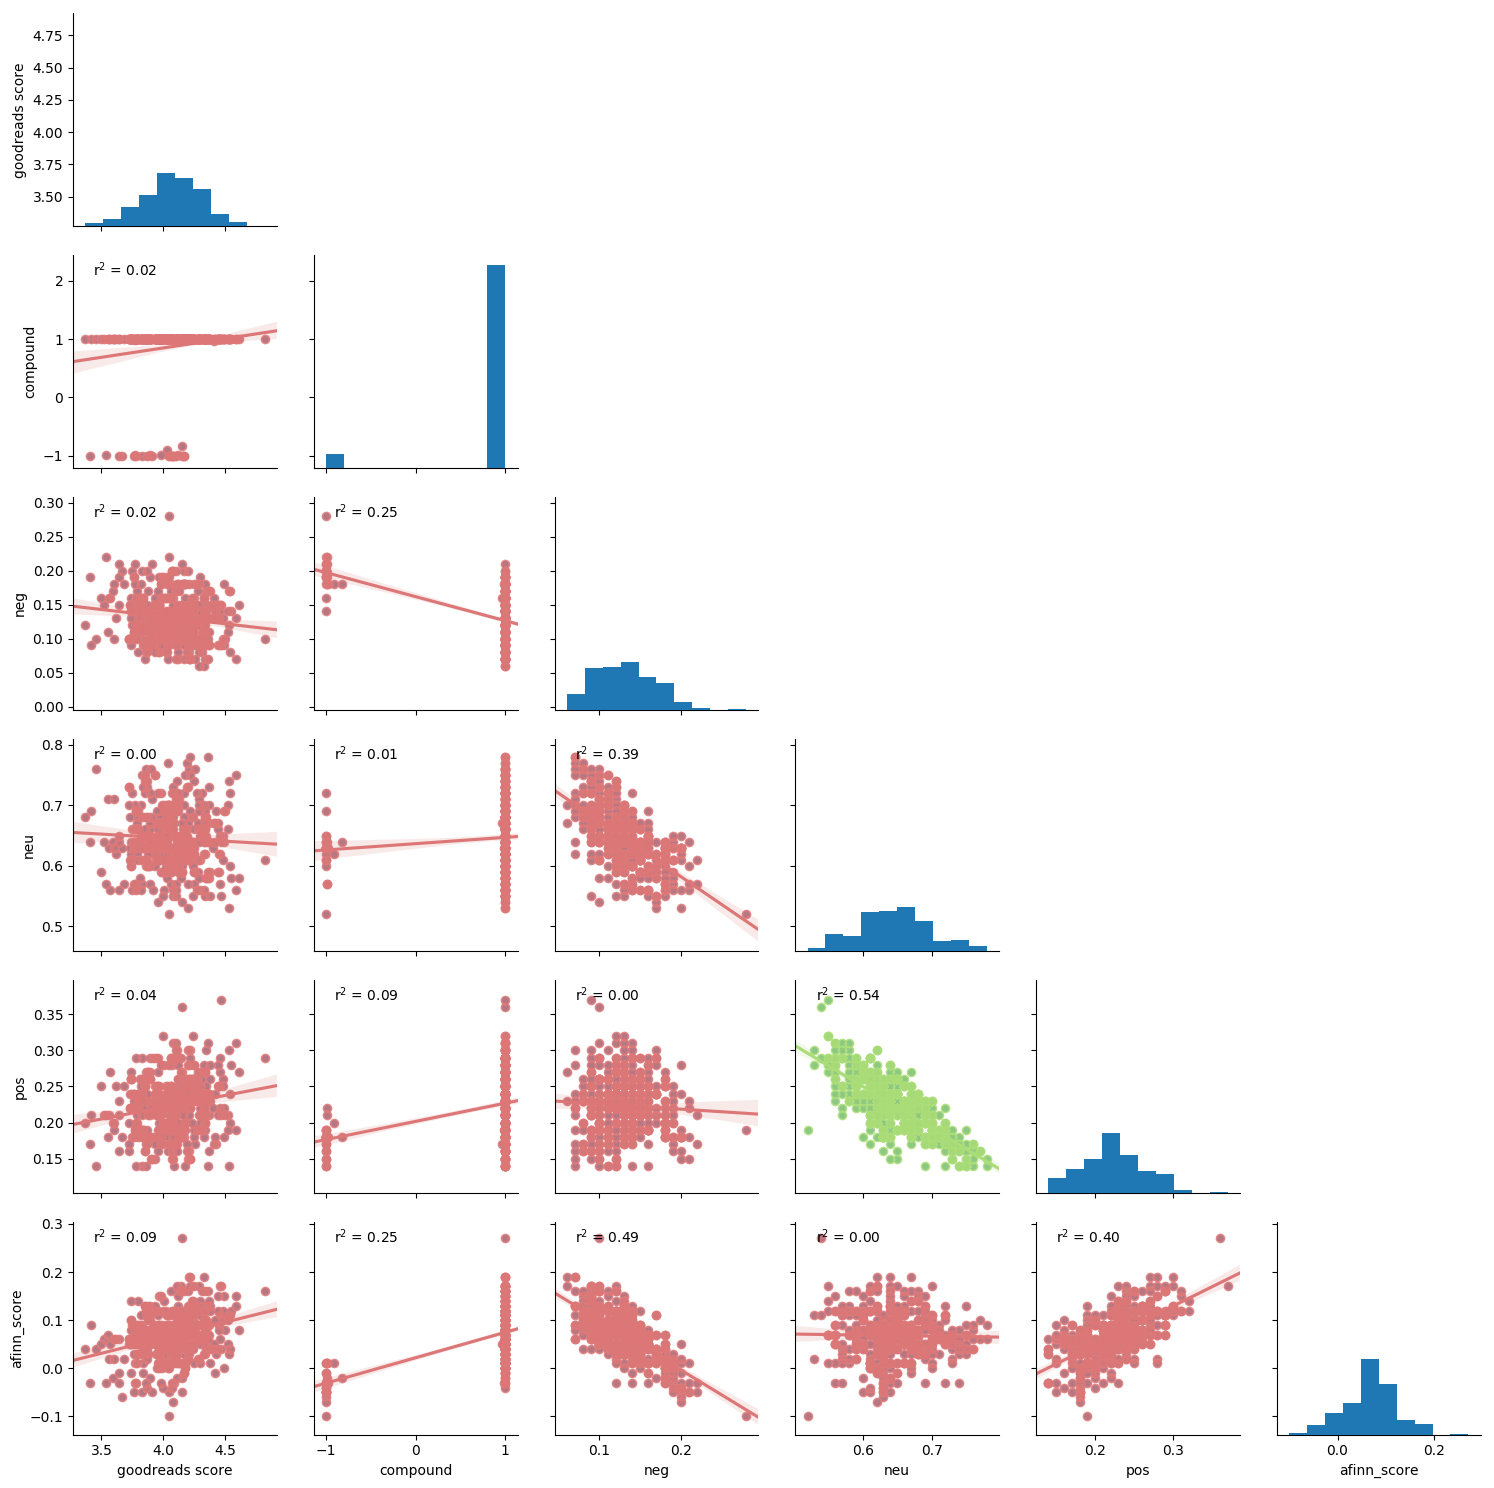

In [93]:
import seaborn.apionly as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

df = filtered_vader_df

def corrfunc(x, y, **kws):
    r = pearsonr(x, y)[0] ** 2
    ax = plt.gca()
    ax.annotate("r$^2$ = {:.2f}".format(r),
                 xy=(.1, .9), xycoords=ax.transAxes)
    if r > 0.5:
       col = "#aadd77"
    elif r < 0.5:
       col= '#dd7777'

    sns.regplot(x,y,color=col)  
    return r

g = sns.pairplot(df)
g.map_offdiag(corrfunc)

for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

plt.show()

The graphs with a pearson score of 0.5 or higher, signaling a correlation, are in green. There is no correlation between the variables we were interested in (i.e the Vader positive, negative, compound scores vs. the goodreads score).

## Would Have, Should Have, Could Have

Our analysis suggested to prefer the Classics genre over other popular genres such as Fiction to optimize an author's chances to make it to the Top 400 list. 

There was no clear pattern indicating a prefered year of publication or number of pages, although most of the Top 400 books average 300 pages.

Finally, the sentiment analysis part was unsuccessful at predicting the success of a book within the Top 400 list. The Afinn and Vader methods helped predict the likelihood of a high score on goodreads.com. However once a book makes it to the Top 400 list and a high level of granularity is required to differentiate it from other successful books to predict its rank, it becomes a different story.

 Below is a **quick list of the analysis I could have, would have and should have done if given more time and data**:
 - **More data about users writing reviews**: I wish the reviews included demographics data on the people writing them to answer questions such as: are inhabitants of a city, women from 40-50 years old more ruthless in their critique, etc.?
 - **Interactivity with the graphs**: This applies mainly for the sentiment analysis. I would have liked to allow someone to select a specific word from a list and see how its frequency and Afinn score correlated with the goodreads score.
 - **Limited number of reviews per book**: I only grabbed the first 30 reviews of a book which does restrict the sentiment analysis and may introduce some bias (although the first reviews are randomly displayed and not sorted by recency).
 - **Coding**: The naming of my functions and dataframes could be improved.
 - **More Insights**: I wish my analysis had been more fruitful, above all with the sentiment analysis part.

## The End

In [291]:
# these are lines of code to apply some css and make the notebook look pretty.
from IPython.core.display import HTML
def css():
    style = open("/Users/clairevignon/.ipython/profile_default/static/custom/custom.css", "r").read()
    return HTML(style)
css()